# Implementing and training a Perceptron

<p>This notebook shows how to represent a Perceptron neuron and how to train and classify samples with it

<small>Author: Fernando Carlos López Hernández</small>

## Representation of the Perceptron
A first approximation to represent a neuron is by means of a vector of inputs, a vector of weights and a variable for the bias

In [1]:
def step(v):
    return 1 if v>0.0 else 0

x = [1.8, 2.0, 1.7]
w = [-1.0, 1.0, -2.0]
b = 2.0
v = b + w[0]*x[0] + w[1]*x[1] +w[2]*x[2] 
-1.2
y = step(v)
0.0;

However we can make a more compact representation using arrays and including the bias as an element of the weights:

In [2]:
import numpy as np

x = [1.0, 1.8, 2.0, 1.7]
w = [2.0, -1.0, 1.0, -2.0]
v = np.dot(w,x)
-1.2
y = step(v)
0.0;

# Classifing with an untrainted Perceptron

First we generate an artificial dataset in X wih 100 samples 2 features/dimensions and 2 possible labels in L

In [3]:
from sklearn.datasets import make_classification

np.random.seed(109)
X, Y = make_classification(n_features=2, n_classes=2, n_samples=100, n_redundant=0, n_clusters_per_class=1)
X = np.hstack([np.ones((100,1)),X]) # The bias input is always 1.0

Then we classify the dataset X using a Perceptron with the initial random weights w.

In [4]:
def perceptron_classify(X, w):
    Y = []
    for x in X:
        Y.append(step(np.dot(w,x)))
    return Y

w = np.random.normal(size = 3)
Y_est = perceptron_classify(X, w)

Then we plot the dataset and the classification made with random weights. Note that the accuracy is low as only about 50% of the samples are correctly classified

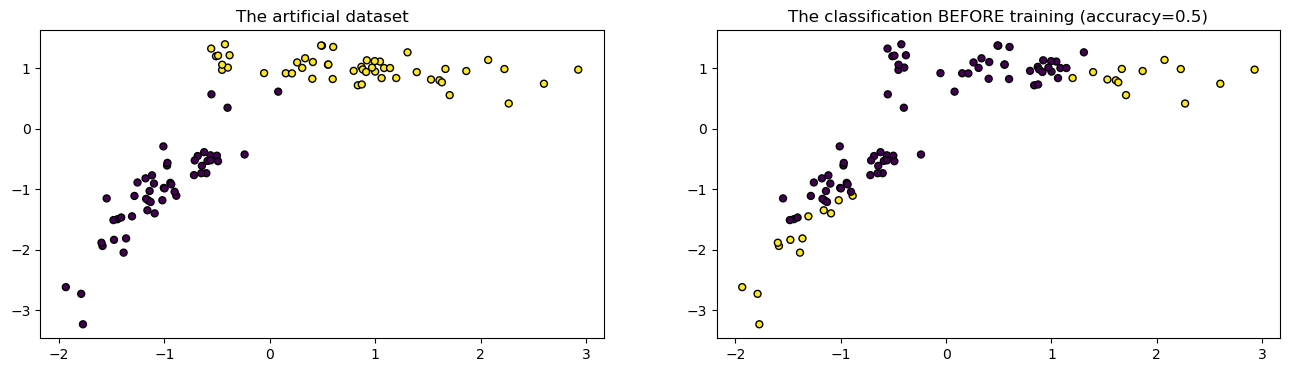

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.title("The artificial dataset")
plt.scatter(X[:, 1], X[:, 2], marker="o", c=Y, s=25, edgecolor="k")
plt.subplot(122)
plt.title(f"The classification BEFORE training (accuracy={np.sum(Y==Y_est)/len(Y)})")
plt.scatter(X[:, 1], X[:, 2], marker="o", c=Y_est, s=25, edgecolor="k");

## Training the Perceptron

Now, we train the Perceptron and use the trained weights w to classify the dataset in Y

In [7]:
learning_rate = 0.1
for epoch in range(100):
    for i,x in enumerate(X):
        y_est = step(np.dot(w,x))
        e = Y[i] - y_est
        w = w + learning_rate*e*x
Y_est = perceptron_classify(X, w)

And we show the artificial dataset and classification result. Note that after training, the Perceptron has correctly classified the 100% of the samples

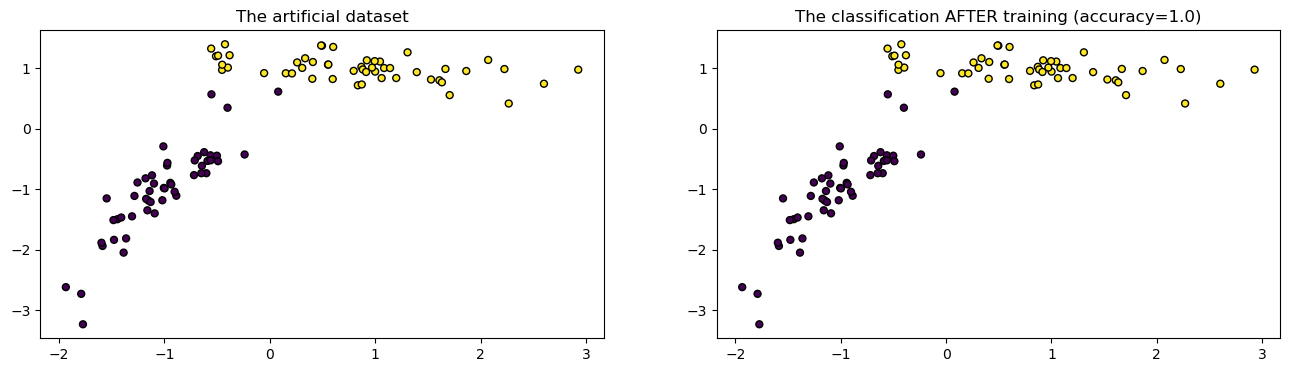

In [8]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.title("The artificial dataset")
plt.scatter(X[:, 1], X[:, 2], marker="o", c=Y, s=25, edgecolor="k")
plt.subplot(122)
plt.title(f"The classification AFTER training (accuracy={np.sum(Y==Y_est)/len(Y)})")
plt.scatter(X[:, 1], X[:, 2], marker="o", c=Y_est, s=25, edgecolor="k");